# Keras-Classification

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

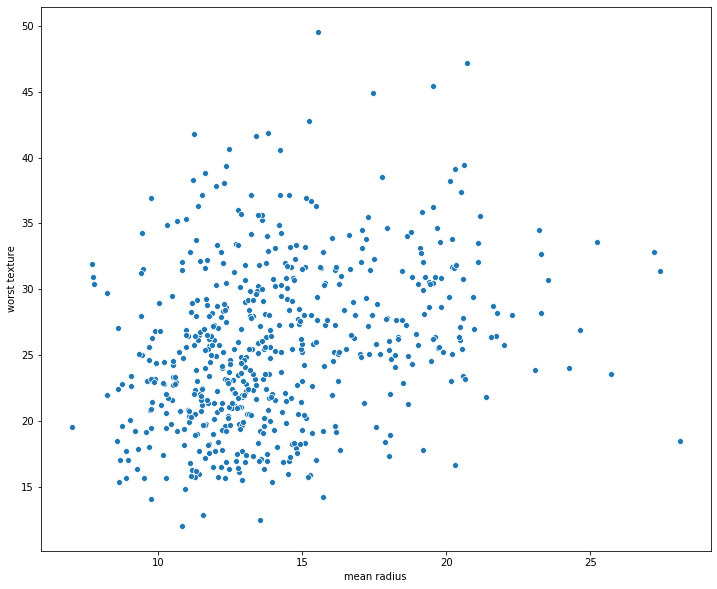

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x = 'mean radius',y = 'worst texture',data = df)

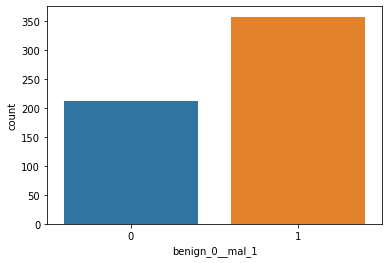

In [17]:
sns.countplot(x = 'benign_0__mal_1',data = df)

In [18]:
df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


In [21]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

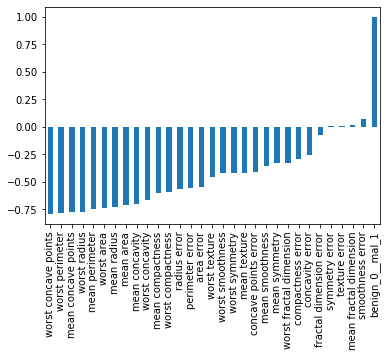

In [22]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

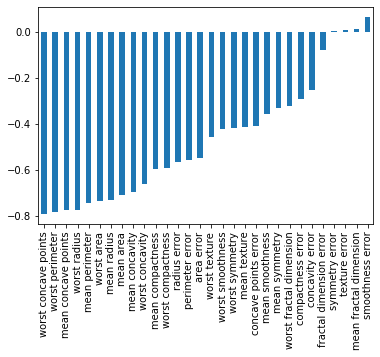

In [23]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

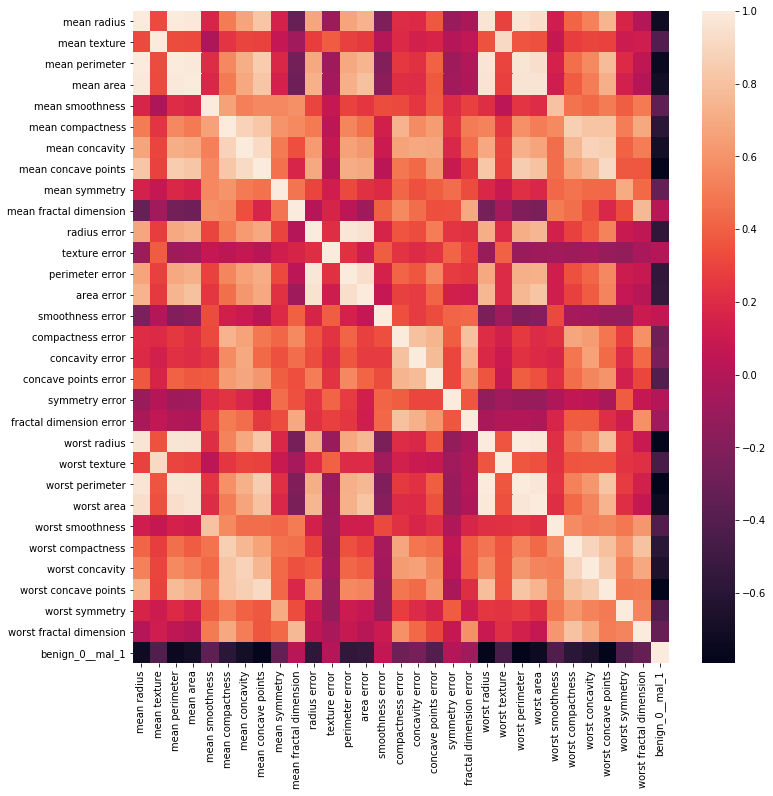

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

In [33]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [43]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential

In [44]:
X_train.shape

(426, 30)

In [45]:
X_test.shape

(143, 30)

In [48]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [51]:
model.fit(x = X_train,y = y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 31ms/step - loss: 0.6958 - val_loss: 0.6851
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6727 - val_loss: 0.6634
Epoch 3/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6488 - val_loss: 0.6393
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6150 - val_loss: 0.5986
Epoch 5/600
14/14 [==============================] - 0s 20ms/step - loss: 0.5689 - val_loss: 0.5490
Epoch 6/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5137 - val_loss: 0.4866
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4574 - val_loss: 0.4304
Epoch 8/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4009 - val_loss: 0.3789
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3607 - val_loss: 0.3357
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3205 - val_loss: 0.3009
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.0525 - val_loss: 0.1137
Epoch 83/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0617 - val_loss: 0.1357
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0565 - val_loss: 0.1169
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0503 - val_loss: 0.1221
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0544 - val_loss: 0.1176
Epoch 87/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0520 - val_loss: 0.1272
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0488 - val_loss: 0.1198
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0486 - val_loss: 0.1214
Epoch 90/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0498 - val_loss: 0.1267
Epoch 91/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0491 - val_loss: 0.1200
Epoch 92/60

14/14 [==============================] - 0s 8ms/step - loss: 0.0400 - val_loss: 0.1369
Epoch 164/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0389 - val_loss: 0.1322
Epoch 165/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0452 - val_loss: 0.1513
Epoch 166/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0443 - val_loss: 0.1297
Epoch 167/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0421 - val_loss: 0.1375
Epoch 168/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0385 - val_loss: 0.1446
Epoch 169/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.1314
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0422 - val_loss: 0.1429
Epoch 171/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0405 - val_loss: 0.1438
Epoch 172/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0365 - val_loss: 0.1334
Epoc

14/14 [==============================] - 0s 10ms/step - loss: 0.0300 - val_loss: 0.1476
Epoch 245/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0300 - val_loss: 0.1590
Epoch 246/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0290 - val_loss: 0.1516
Epoch 247/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0301 - val_loss: 0.1566
Epoch 248/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0290 - val_loss: 0.1488
Epoch 249/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0316 - val_loss: 0.1582
Epoch 250/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0291 - val_loss: 0.1551
Epoch 251/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0298 - val_loss: 0.1799
Epoch 252/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0373 - val_loss: 0.1463
Epoch 253/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0309 - val_loss: 0.1699
E

14/14 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.1762
Epoch 326/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0235 - val_loss: 0.1985
Epoch 327/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0268 - val_loss: 0.1754
Epoch 328/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0252 - val_loss: 0.1745
Epoch 329/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0226 - val_loss: 0.1856
Epoch 330/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.1870
Epoch 331/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0227 - val_loss: 0.1730
Epoch 332/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0224 - val_loss: 0.1849
Epoch 333/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0255 - val_loss: 0.1778
Epoch 334/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0236 - val_loss: 0.1943


14/14 [==============================] - 0s 9ms/step - loss: 0.0180 - val_loss: 0.2181
Epoch 407/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0195 - val_loss: 0.2150
Epoch 408/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0189 - val_loss: 0.2049
Epoch 409/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0169 - val_loss: 0.2112
Epoch 410/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0191 - val_loss: 0.2186
Epoch 411/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0180 - val_loss: 0.2298
Epoch 412/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0172 - val_loss: 0.2141
Epoch 413/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0176 - val_loss: 0.2240
Epoch 414/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0168 - val_loss: 0.2165
Epoch 415/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0159 - val_loss: 0.2204
Epo

14/14 [==============================] - 0s 8ms/step - loss: 0.0133 - val_loss: 0.2504
Epoch 488/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0122 - val_loss: 0.2727
Epoch 489/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0127 - val_loss: 0.2595
Epoch 490/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0129 - val_loss: 0.2542
Epoch 491/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.2804
Epoch 492/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0125 - val_loss: 0.2624
Epoch 493/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0152 - val_loss: 0.2663
Epoch 494/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0130 - val_loss: 0.2483
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0128 - val_loss: 0.2673
Epoch 496/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0119 - val_loss: 0.2538
Epoc

14/14 [==============================] - 0s 10ms/step - loss: 0.0246 - val_loss: 0.2701
Epoch 569/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.2867
Epoch 570/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0108 - val_loss: 0.3069
Epoch 571/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0087 - val_loss: 0.3090
Epoch 572/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0089 - val_loss: 0.2971
Epoch 573/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0089 - val_loss: 0.3030
Epoch 574/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.3115
Epoch 575/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0084 - val_loss: 0.2972
Epoch 576/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0083 - val_loss: 0.3200
Epoch 577/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0086 - val_loss: 0.3042
Ep

In [54]:
losses = pd.DataFrame(model.history.history)

In [55]:
losses

,loss,val_loss
0,0.007959,0.321099
1,0.008534,0.346335
2,0.010573,0.313242
3,0.014809,0.360914
4,0.012295,0.296830
...,...,...
595,0.000693,0.754252
596,0.000674,0.757295
597,0.000684,0.756161
598,0.000644,0.753584


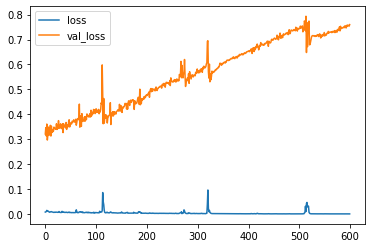

In [56]:
losses.plot()

In [57]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [58]:
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be 'loss', and mode would be 'min'. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Example:
 |  
 |  >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 |  >>> # This cal

In [61]:
earlystop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [63]:
model.fit(x = X_train,y = y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/600
14/14 [==============================] - 0s 21ms/step - loss: 0.6876 - val_loss: 0.6759
Epoch 2/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6585 - val_loss: 0.6508
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6304 - val_loss: 0.6206
Epoch 4/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5962 - val_loss: 0.5817
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5493 - val_loss: 0.5283
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4874 - val_loss: 0.4595
Epoch 7/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4223 - val_loss: 0.4021
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.3688 - val_loss: 0.3475
Epoch 9/600
14/14 [==============================] - 0s 10ms/step - loss: 0.3246 - val_loss: 0.3058
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.2889 - val_loss: 0.2704
Epoch

14/14 [==============================] - 0s 10ms/step - loss: 0.0527 - val_loss: 0.1075
Epoch 83/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0521 - val_loss: 0.1129
Epoch 84/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0525 - val_loss: 0.1113
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0576 - val_loss: 0.1068
Epoch 86/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0514 - val_loss: 0.1060
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0503 - val_loss: 0.1123
Epoch 88/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0504 - val_loss: 0.1071
Epoch 89/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0519 - val_loss: 0.1036
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0513 - val_loss: 0.1164
Epoch 91/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0506 - val_loss: 0.1114
Epoch 0009

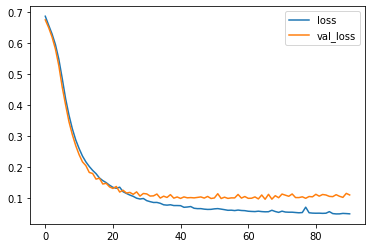

In [64]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [65]:
from tensorflow.keras.layers import Dropout

In [68]:
model = Sequential()

model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))
#Binary classification problem
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam')

In [69]:
model.fit(x = X_train,y = y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[earlystop])

Epoch 1/600
14/14 [==============================] - 0s 20ms/step - loss: 0.7613 - val_loss: 0.7014
Epoch 2/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6966 - val_loss: 0.6742
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6837 - val_loss: 0.6506
Epoch 4/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6527 - val_loss: 0.6281
Epoch 5/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6369 - val_loss: 0.5988
Epoch 6/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6059 - val_loss: 0.5652
Epoch 7/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5878 - val_loss: 0.5300
Epoch 8/600
14/14 [==============================] - 0s 10ms/step - loss: 0.5501 - val_loss: 0.4936
Epoch 9/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5254 - val_loss: 0.4594
Epoch 10/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4925 - val_loss: 0.4265
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.1251 - val_loss: 0.0895
Epoch 83/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1231 - val_loss: 0.0940
Epoch 84/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1532 - val_loss: 0.0929
Epoch 85/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1248 - val_loss: 0.1050
Epoch 86/600
14/14 [==============================] - 0s 7ms/step - loss: 0.1191 - val_loss: 0.0920
Epoch 87/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1139 - val_loss: 0.0907
Epoch 88/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1230 - val_loss: 0.0872
Epoch 89/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1243 - val_loss: 0.0877
Epoch 90/600
14/14 [==============================] - 0s 9ms/step - loss: 0.1139 - val_loss: 0.0905
Epoch 91/600
14/14 [==============================] - 0s 8ms/step - loss: 0.1364 - val_loss: 0.0868
Epoch 92/600


14/14 [==============================] - 0s 14ms/step - loss: 0.1270 - val_loss: 0.0766
Epoch 164/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0803 - val_loss: 0.0931
Epoch 165/600
14/14 [==============================] - 0s 13ms/step - loss: 0.0649 - val_loss: 0.0918
Epoch 166/600
14/14 [==============================] - 0s 10ms/step - loss: 0.0830 - val_loss: 0.0865
Epoch 167/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0861 - val_loss: 0.0827
Epoch 168/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0851 - val_loss: 0.0862
Epoch 169/600
14/14 [==============================] - 0s 9ms/step - loss: 0.0850 - val_loss: 0.0845
Epoch 170/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0834 - val_loss: 0.0809
Epoch 171/600
14/14 [==============================] - 0s 11ms/step - loss: 0.0640 - val_loss: 0.1039
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0809 - val_loss: 0.0843


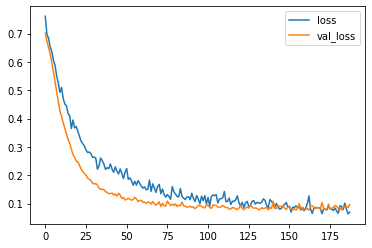

In [70]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [71]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [72]:
predictions = model.predict_classes(X_test)

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [75]:
    print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
